In [1]:
## this makes figure 12 of the LVDB overview paper 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table
import yaml

In [3]:
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
## loads lasted versions from github

gc_ufsc = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ufsc.csv')
gc_disk = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_disk.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')
gc_dwarf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_dwarf_hosted.csv')

In [5]:
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = 'tab:purple'
color_gc_harris = 'tab:brown'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'tab:grey'

label_dsph_mw = r'${\rm Dwarf~MW}$'
label_dsph_m31 = r'${\rm Dwarf~M31}$'
label_dsph_lf = r'${\rm Dwarf~LF}$'
label_dsph_lf_distant = r'${\rm Dwarf~Distant}$'
label_gc_ufcss = r'${\rm UFCSS}$'
label_gc_harris = r'${\rm GC~Harris}$'
label_gc_disk =r'${\rm GC~New~Bulge/Disk}$'
label_gc_lmc_smc =r'${\rm GC~LMC/SMC}$'
label_gc_dwarf =r'${\rm GC~Dwarf}$'

In [6]:
keep = np.zeros(len(gc_dwarf), dtype=bool)
for i in range(len(gc_dwarf)):
    if gc_dwarf['host'][i] in ['lmc', 'smc']:
        keep[i]=True
    else:
        keep[i]=False
lmc_smc = gc_dwarf[keep]
gc_dwarf2 = gc_dwarf[~keep]

keep = np.zeros(len(gc_dwarf), dtype=bool)
for i in range(len(gc_dwarf)):
    if gc_dwarf['host'][i] not in ['lmc', 'smc'] :
        keep[i]=True
    else:
        keep[i]=False
gc_dwarf_mw = gc_dwarf[keep]
print(len(gc_dwarf_mw), len(lmc_smc), len(gc_dwarf2), len(gc_dwarf))
keep = np.zeros(len(gc_harris), dtype=bool)
for i in range(len(gc_harris)):
    if gc_harris['host'][i] in ['sagittarius_1']:
        keep[i]=True
#         print(i, gc_harris['key'][i], gc_harris['host'][i])
    else:
        keep[i]=False
gc_dwarf_sgr = gc_harris[keep]
gc_harris2 = gc_harris[~keep]
print(len(gc_dwarf_sgr), len(gc_harris2))

87 48 87 135
8 147


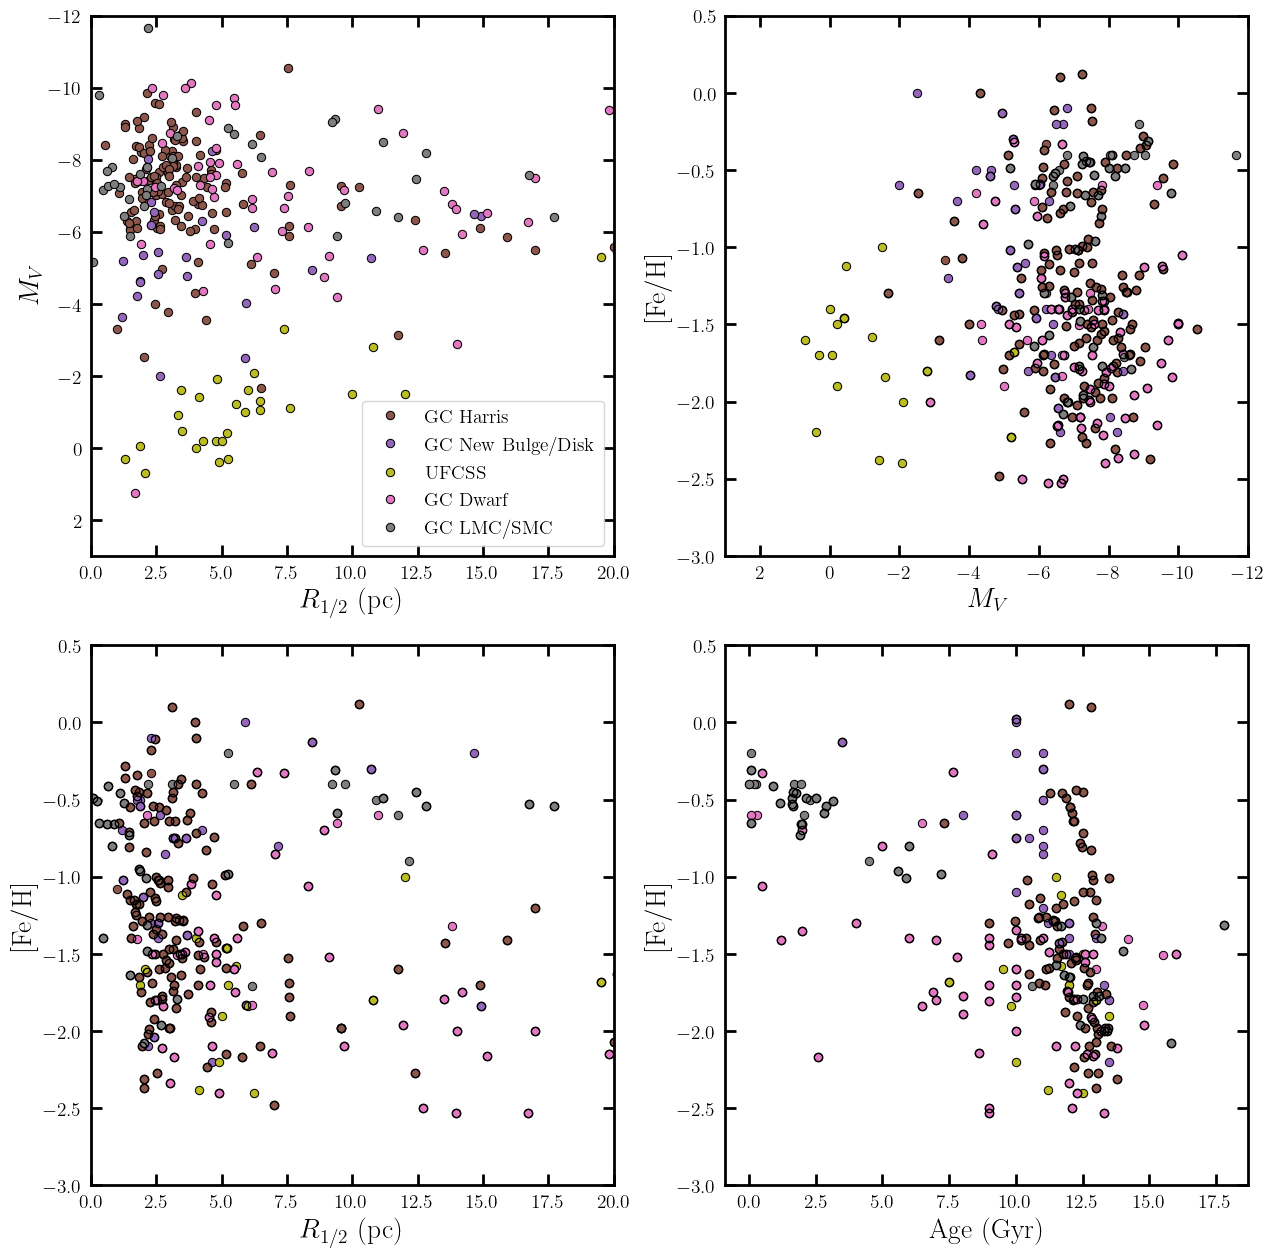

In [7]:
fig, ax = plt.subplots(2,2, figsize=(16*.8, 16*.8))

for obj, color, label in zip([gc_harris2, gc_disk, gc_ufsc, gc_dwarf2, gc_dwarf_sgr, lmc_smc], [color_gc_harris,color_gc_disk,  color_gc_ufcss, color_gc_dwarf,color_gc_dwarf, color_gc_lmc_smc], [label_gc_harris, label_gc_disk, label_gc_ufcss, label_gc_dwarf, '', label_gc_lmc_smc]):
    ax[0][0].errorbar( obj['rhalf_sph_physical'], obj['M_V'],fmt='o',  c=color, label=label,  mec='k', mew=0.75)
    
    ax[0][1].errorbar( obj['M_V'], obj['metallicity'],fmt='o',  c=color, label=label,  mec='k', mew=0.75)
    obj2= obj[obj['metallicity_type']=='spectroscopic']
    ax[0][1].plot(obj2['M_V'], obj2['metallicity'], 'o', mfc='None', mec='k', lw=2, zorder=1000)
    
    ax[1][0].errorbar( obj['rhalf_sph_physical'], obj['metallicity'],fmt='o',  c=color, label=label,  mec='k', mew=0.75)
    obj2= obj[obj['metallicity_type']=='spectroscopic']
    ax[1][0].plot(obj2['rhalf_sph_physical'], obj2['metallicity'], 'o', mfc='None', mec='k', lw=2, zorder=1000)
    
    ax[1][1].errorbar( obj['age'], obj['metallicity'],fmt='o',  c=color, label=label,  mec='k', mew=0.75)
    obj2= obj[obj['metallicity_type']=='spectroscopic']
    ax[1][1].plot(obj2['age'], obj2['metallicity'], 'o', mfc='None', mec='k', lw=2, zorder=1000)
    

ax[0][0].set_xlim(0,20)
ax[0][0].set_ylim(3,-12)
ax[0][0].set_xlabel(r'$R_{1/2}~({\rm pc})$')
ax[0][0].set_ylabel(r'$M_V$')

ax[0][1].set_ylabel(r'${\rm [Fe/H]}$')
ax[0][1].set_xlabel(r'$M_V$')
ax[0][1].set_xlim(3,-12)
ax[0][1].set_ylim(-3, .5)

ax[1][0].set_ylabel(r'${\rm [Fe/H]}$')
ax[1][0].set_xlabel(r'$R_{1/2}~({\rm pc})$')
ax[1][0].set_xlim(0,20)
ax[1][0].set_ylim(-3, .5)

ax[1][1].set_ylabel(r'${\rm [Fe/H]}$')
ax[1][1].set_xlabel(r'${\rm Age}~({\rm Gyr})$')
ax[1][1].set_ylim(-3, .5)


plt.tight_layout()
ax[0][0].legend(loc=4)
plt.savefig('plots/gc_summary.pdf')
plt.show()